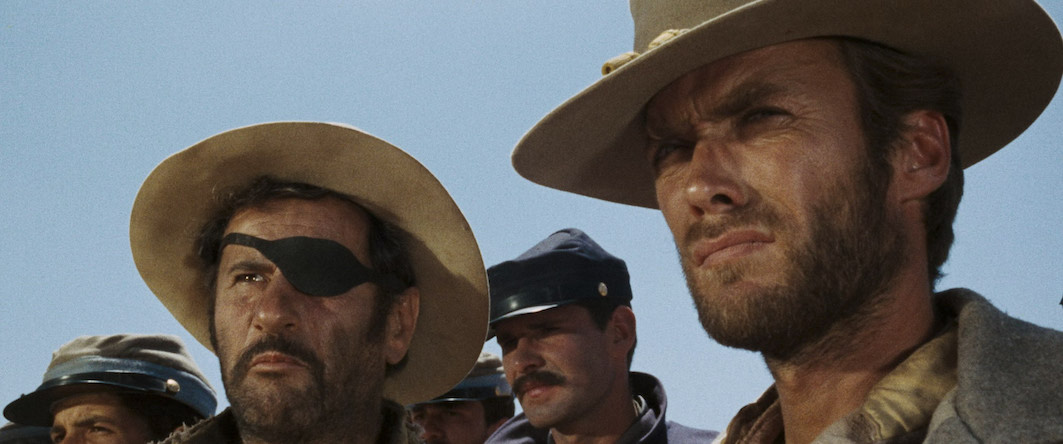

---

### SUMMARY

1. [Read the Data](#1)
2. [Feature Engineering](#2)
3. [Data Analytics](#3)

---

In [108]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import ast

import plotly
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk 
from nltk.stem.porter import PorterStemmer

from warnings import simplefilter
simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv');   

pd.set_option('display.max_columns', None)
movies.head()

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv
/kaggle/input/idmb-movies-user-friendly/MOVIES.csv


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Let's start gathering the basic informations on the dataset.

In [109]:
print('The dataset has {} rows and {} columns.'.format(movies.shape[0],movies.shape[1]))

The dataset has 45466 rows and 24 columns.


<div class="alert alert-block alert-info"> 📌 The dataset is huge. It has more than 45k rows and 24 columns. At first sight, it seems that there are some problems with it: there are several null values and also unrealistic entries in some columns (e.g. movies with budget equal to zero).</div> 

**Null and Duplicate Values**

In [110]:
movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

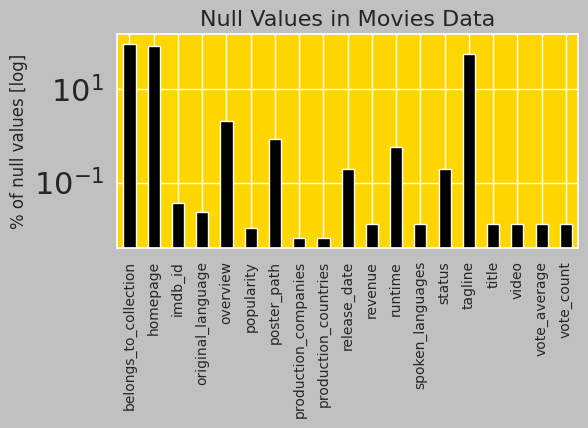

In [111]:
nulls_movies = movies.apply(lambda x:x.isnull().value_counts()).T[True]/len(movies)*100
nulls_movies = nulls_movies[~np.isnan(nulls_movies)].to_frame()

nulls_movies.plot(kind='bar',color='black',legend=None)

plt.xlabel('')
plt.ylabel('% of null values [log]',fontsize=12)
plt.yscale('log')
plt.title('Null Values in Movies Data',fontsize=16)
plt.xticks(fontsize=10)

plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')
plt.show()

As expected, there are columns (like *tagline* and *belongs_to_collection*) that are almost completely populated by null entries. We will have to think whether to keep all of them or drop a few.

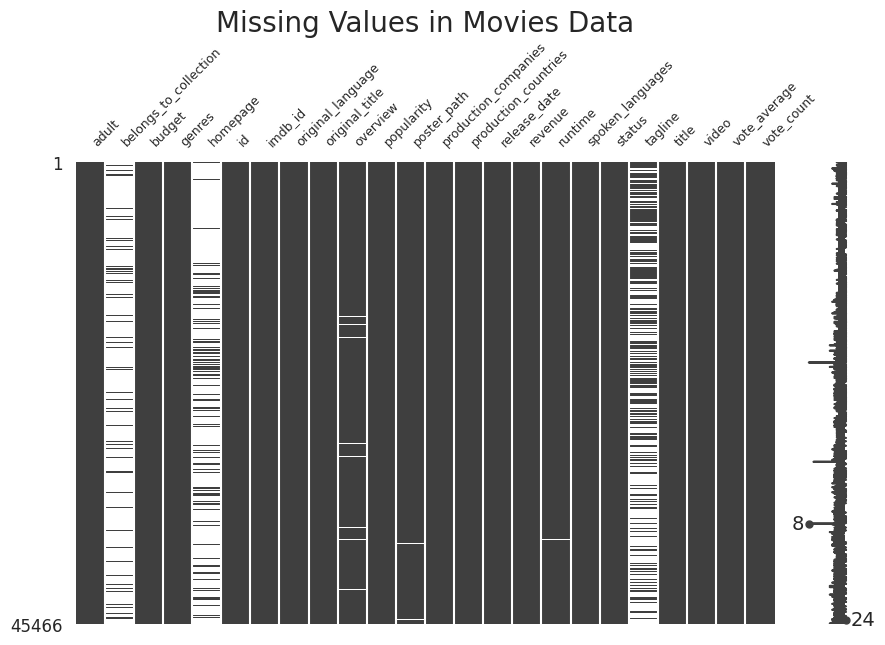

In [112]:
msno.matrix(movies,figsize=(10, 6))
plt.title('Missing Values in Movies Data',fontsize=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=12)
plt.show();

This is a different kind of visualization for the missing data, where the white lines represent the null values.

In [113]:
if movies.duplicated().values.any():
    print("The dataset has duplicate entries.")
else:
    print('No duplicate entries in the dataframe.')

The dataset has duplicate entries.


There are duplicate entries. I will drop them.

In [114]:
movies = movies.drop_duplicates()

print('The dataset has {} rows and {} columns.'.format(movies.shape[0],movies.shape[1]))

The dataset has 45453 rows and 24 columns.


<a id="2"></a>
# 2. Feature Engineering

### 2.1 Drop Some Columns

**id and imdb_id Columns**

In [115]:
movies['id'].duplicated().value_counts()

id
False    45436
True        17
Name: count, dtype: int64

With a few exceptions, the movie *id*s are single-valued. I am printing the duplicate entries and their count. Then, I will drop them.

In [116]:
duplicateCheck = movies.duplicated(subset=['id'],keep='last')

print('No. of duplicates: {}'.format(len(movies[duplicateCheck])))
print()      
print(movies[duplicateCheck]['title'])

No. of duplicates: 17

838                                             Wife
949                               A Farewell to Arms
2564                            A Place at the Table
4114                   Pokémon: Spell of the Unknown
4356                            Camille Claudel 1915
5130                                   Clockstoppers
5535     Pokémon 4Ever: Celebi - Voice of the Forest
5710                                 Rich and Famous
5865                 Confessions of a Dangerous Mind
9576                        The Phantom of the Opera
10419                                         Bubble
11155                                     Black Gold
11342                                        Offside
13220               Why We Fight: Divide and Conquer
13946                           Seven Years Bad Luck
16167                                     The Viking
24164                                  Force Majeure
Name: title, dtype: object


In [117]:
movies = movies.drop(movies[duplicateCheck].index)

len(movies)

45436

The *id* column was very useful to find duplicate movies. Now I can drop it.

In [118]:
movies = movies.drop('id',axis=1)

I will also drop the *imdb_id*, *poster_path*, and *video* columns.

In [119]:
movies = movies.drop(columns=['imdb_id','poster_path','video'],axis=1)

**Status Column**

This column describes the release status of a movie. I will only keep the released movies and drop the others.

In [120]:
movies['status'].value_counts()

status
Released           44985
Rumored              229
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

In [121]:
movies = movies.drop(movies[movies['status'] != 'Released'].index)

movies['status'].value_counts()

status
Released    44985
Name: count, dtype: int64

Now I can drop the column *status*.

In [122]:
movies.drop('status',axis=1,inplace=True)

### 2.2 Manipulate Some Columns

**Spoken Languages and Original Language**

I will extract information from this column and convert it into a more usable format.

In [123]:
movies['spoken_languages'][1]

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]"

The column contains lists of dictionaries, converted into strings.

I will create a new column 'languages' and populate it with lists of 'spoken languages' instead of dictionaries. I will also fill null values with lists ['not available']. Finally, I will drop the column 'spoken languages'.

In [124]:
movies['languages'] = '' 

languages = []
list_null = ['not available']

# For each row in the dataframe ...
for i in movies.index:
    if movies.loc[i,'spoken_languages'] in ['null']:
        languages.append(list_null)
    else: 
        res = ast.literal_eval(movies.loc[i,'spoken_languages'])
        list_lang = []
        for x in res:
            list_lang.append(x['name'])
        languages.append(list_lang)    

# Fill the new column 'languages' with the list content
movies['languages'] = languages

movies = movies.drop('spoken_languages',axis=1)

Then, I will fill the null values in the column 'original_language' with 'not available'.

In [125]:
movies.loc[movies['original_language'].isnull(),'original_language'] = 'not available'

**Release Date**

I will extract time features (like the release year, month and season) from the release date for each movie.

In [126]:
### Create column 'day of week' ###
movies['day_of_week'] = pd.to_datetime(movies['release_date']).dt.strftime("%A")

### Create column 'month' ###
movies['month'] = pd.to_datetime(movies['release_date']).dt.strftime("%b")

### Create column 'season' ###
Q1 = ['Jan','Feb','Mar']
Q2 = ['Apr','May','Jun']
Q3 = ['Jul','Aug','Sep']
Q4 = ['Oct','Nov','Dec']

def month_handler(row):
    if row['month'] in Q1:
        return 'Q1'
    if row['month'] in Q2:
        return 'Q2'
    if row['month'] in Q3:
        return 'Q3'
    if row['month'] in Q4:
        return 'Q4'

movies['season'] = movies.apply(month_handler,axis=1)

### Create column 'year' ###
movies['year'] = pd.to_datetime(movies['release_date']).dt.strftime("%Y")

movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_average,vote_count,languages,day_of_week,month,season,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,NaN,Toy Story,7.7,5415.0,[English],Monday,Oct,Q4,1995
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[English, Français]",Friday,Dec,Q4,1995


Fill the null values in the date columns.

In [127]:
movies.loc[movies['release_date'].isnull(),'release_date'] = 'not available'
movies.loc[movies['day_of_week'].isnull(),'day_of_week'] = 'not available'
movies.loc[movies['month'].isnull(),'month'] = 'not available'
movies.loc[movies['season'].isnull(),'season'] = 'not available'
movies.loc[movies['year'].isnull(),'year'] = '0'

**Homepage**

Some columns may have to be dropped due to the high incidence of null values in their entries. Let's start examining the column *homepage* and see if the nulls there are missing because of sloppiness or simply because lower budget (or very low rated) movies may not have a homepage. People may just not be interested in them.

In [128]:
movies_homepage = movies.dropna(subset=['homepage'])
movies_no_homepage = movies[movies['homepage'].isnull()]

len(movies_homepage), len(movies_no_homepage)

(7701, 37284)

Now, let's see what are the revenues of these 7776 movies (out of 45K) that do not have a homepage and compare them to those that do have one.

Let's print the statistical summaries for the two groups of movies, starting from movies with a homepage.

In [129]:
movies_homepage.describe()

,revenue,runtime,vote_average,vote_count
count,7.701000e+03,7701.000000,7701.000000,7701.000000
mean,3.784797e+07,97.830152,5.949448,346.369822
std,1.355041e+08,36.939680,1.680657,1022.382653
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,86.000000,5.400000,6.000000
50%,0.000000e+00,95.000000,6.200000,20.000000
75%,1.473809e+06,109.000000,7.000000,139.000000
max,2.787965e+09,900.000000,10.000000,14075.000000


In [130]:
movies_no_homepage.describe()

,revenue,runtime,vote_average,vote_count
count,3.728400e+04,37033.000000,37284.000000,37284.000000
mean,5.843424e+06,93.528286,5.556611,62.297742
std,3.281780e+07,38.614962,1.954298,253.951018
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,9.000000
75%,0.000000e+00,106.000000,6.800000,28.000000
max,8.766885e+08,1256.000000,10.000000,8670.000000


The vote counts are quite different: on average, movies with no homepage receive less votes and consideration from users.

In [131]:
print('The average revenues of movies with homepage are {:.0f} M$; those of movies with no homepage are {:.0f} M$.'.format(movies_homepage['revenue'].mean()/10**6,movies_no_homepage['revenue'].mean()/10**6))

The average revenues of movies with homepage are 38 M$; those of movies with no homepage are 6 M$.


There is a difference in revenues between movies with or without a homepage. Let's have a look at their average ratings.

In [132]:
print('The average rating of movies with homepage is {:.1f}; that of movies with no homepage is {:.1f}.'.format(movies_homepage['vote_average'].mean(),movies_no_homepage['vote_average'].mean()))

The average rating of movies with homepage is 5.9; that of movies with no homepage is 5.6.


There is also a slightly difference in the average ratings between these kinds of movies. It seems that movies with no homepage are lower quality. 

Finally, let's check if there is also a difference in the release dates.

In [133]:
print('Mode value for the release year of movies with/without a home page: {}, {}.'.format(movies_homepage['year'].mode()[0],movies_no_homepage['year'].mode()[0]))

Mode value for the release year of movies with/without a home page: 2011, 2014.


I would have expected the release year mode of movies without a home page to be older than that of movies with a homepage, but this is not the case. 
<div class="alert alert-block alert-success"> 📌 Therefore, having/not having a homepage is not about being an old/new movie, but instead about being higher or lower rated.</div>

I will substitute the *homepage* column with a new Boolean column *has_homepage*.

In [134]:
movies.loc[movies['homepage'].isnull(),'has_homepage'] = 'NO'
movies.loc[~movies['homepage'].isnull(),'has_homepage'] = 'YES'

movies = movies.drop(['homepage'],axis=1)

In [135]:
movies['has_homepage'].value_counts()

has_homepage
NO     37284
YES     7701
Name: count, dtype: int64

**Belongs to Collection**

This column is either a null (movies that are not part of a collection) or a dictionary.

In [136]:
movies['belongs_to_collection'][0]

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

I will create a new column out of this, providing either the collection name or the 'none' value. It is worth to note that the dictionary entries were converted into strings. To extract the collection names, they will have to be converted back into dictionaries by means of the *ast* module.

In [137]:
movies.loc[movies['belongs_to_collection'].isnull(),'belongs_to_collection'] = 'not available'

for collection in movies[movies['belongs_to_collection'] != 'not available']['belongs_to_collection']:
    res = ast.literal_eval(collection)
    collection_name = res['name']
    movies.loc[movies['belongs_to_collection'] == collection,'belongs_to_collection'] = collection_name

**Genres**

The movie genres are given as lists of dictionaries (then converted into strings). I have to turn the lists of dicionaries into lists of genres to make the data more easily manageable.

In [138]:
movies['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [139]:
movies['genre'] = '' 

genres = []

# For each row in the dataframe ...
for i in movies.index:
    if movies.loc[i,'genres'] in ['null']:
        genres.append(list_null)
    else: 
        res = ast.literal_eval(movies.loc[i,'genres'])
        list_genre = []
        for x in res:
            list_genre.append(x['name'])
        genres.append(list_genre)    

# Fill the new column 'genre' with the 'genres' list content
movies['genre'] = genres
# Drop the old column 'genres'
movies = movies.drop('genres',axis=1)

**production_companies and production_countries**

In [140]:
movies['companies'] = '' 

companies = []

# For each row in the dataframe ...
for i in movies.index:
    if movies.loc[i,'production_companies'] in ['null']:
        companies.append(list_null)
    else: 
        res = ast.literal_eval(movies.loc[i,'production_companies'])
        list_companies = []
        for x in res:
            list_companies.append(x['name'])
        companies.append(list_companies)    

# Fill the new column 'companies' with the 'companies' list content
movies['companies'] = companies
# Drop the old column 'production_companies'
movies = movies.drop('production_companies',axis=1)

In [141]:
movies['countries'] = '' 

countries = []

# For each row in the dataframe ...
for i in movies.index:
    if movies.loc[i,'production_countries'] in ['null']:
        companies.append(list_null)
    else: 
        res = ast.literal_eval(movies.loc[i,'production_countries'])
        list_countries = []
        for x in res:
            list_countries.append(x['name'])
        countries.append(list_countries)    

# Fill the new column 'countries' with the 'countries' list content
movies['countries'] = countries
# Drop the old column 'production_countries'
movies = movies.drop('production_countries',axis=1)

**Fill the Remaining Nulls**

In [142]:
movies.loc[movies['overview'].isnull(),'overview'] = 'not available'
movies.loc[movies['tagline'].isnull(),'tagline'] = 'not available'
movies.loc[movies['runtime'].isnull(),'runtime'] = 0

<a id="3"></a>
# 3. Data Analytics

### 3.1 Movie Production by Year and Country

I will start by having a look at the (all-time) movie production by country and also at the production by country and by vicennium (i.e. a 20 year period).

First, I will create a dictionary with the countries as keys and the respective number of produced movies as values.

In [143]:
movies_country = {}
movies_country['world except USA'] = 0

for country_list in movies['countries']:
    for country in country_list:
        if country not in movies_country:
            movies_country[country] = 0
        movies_country[country] += 1
        if country != 'United States of America':
            movies_country['world except USA'] += 1
            
top10_countries = sorted(movies_country,key=movies_country.get,reverse=True)[:11]

top10_list = []
for country in top10_countries:
    top10_list.append((country,movies_country[country]))
    
top10_list              

[('world except USA', 27985),
 ('United States of America', 21005),
 ('United Kingdom', 4074),
 ('France', 3893),
 ('Germany', 2235),
 ('Italy', 2144),
 ('Canada', 1744),
 ('Japan', 1638),
 ('Spain', 956),
 ('Russia', 903),
 ('India', 821)]

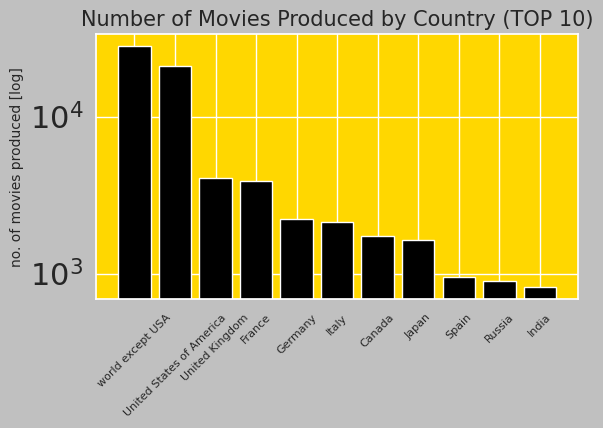

In [144]:
xval = [x[0] for x in top10_list]
yval = [x[1] for x in top10_list]

plt.bar(x=xval,height=yval,color='black')

plt.xlabel('')
plt.ylabel('no. of movies produced [log]',fontsize=10)
plt.yscale('log')
plt.title('Number of Movies Produced by Country (TOP 10)',fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')
plt.show()

<div class="alert alert-block alert-success"> 📌 As expected, the USA have the largest movie industry in the world. Only the entire world production combined exceeds that of America.</div>
Later it will be interesting to check the movie ratings to see if, in the case of the USA, the average quality of the movies matches their great quantity.

I am plotting the world color map, showing the total number of movies produced by country. The data is highly unbalanced towards the USA, thus I am using a $Log_{10}$ scale for the total number of movies. Recall that, in a logarithm to base 10 scale, a value of $Log_{10}$(counts) = 2 stands for 100 counts, $Log_{10}$(counts) = 3 stands for 1000 counts, and so on.

In [145]:
country_movie_map = pd.DataFrame(movies_country.items(),columns=['country','nMovies'])

#Initializing the data variable
data = dict(type = 'choropleth',
            locations = country_movie_map['country'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'viridis',
            text = country_movie_map['country'],
            z = np.log10(country_movie_map['nMovies']),
            colorbar = {'title':'Log10 (no. of movies)','len':0.75,'lenmode':'fraction'})

#Initializing the object for graph_objs.Figure class
movies_map = gobj.Figure(data=[data])

movies_map.update_layout(title_text = 'Number of Movies Produced by Country (logarithmic scale)')

movies_map.update_layout(paper_bgcolor="grey",font=dict(color="black",size=16))

#plotting the map
iplot(movies_map)

Let's have a look at the production by country and also by vicennium (years 1940-1960, 1960-1980, 1980-2000 and 2000-2020) to see whether this kind of Hollywood domination is more recent or if it dates back to the postwar years.

In [146]:
movies['year'] = movies['year'].astype('int64')

In [147]:
movies_4060 = movies[(movies['year'] >= 1940) & (movies['year'] < 1960)]
movies_6080 = movies[(movies['year'] >= 1960) & (movies['year'] < 1980)]
movies_8000 = movies[(movies['year'] >= 1980) & (movies['year'] < 2000)]
movies_0020 = movies[movies['year'] >= 2000]

movies_country_4060 = {}
movies_country_6080 = {}
movies_country_8000 = {}
movies_country_0020 = {}
movies_country_4060['world except USA'] = 0
movies_country_6080['world except USA'] = 0
movies_country_8000['world except USA'] = 0
movies_country_0020['world except USA'] = 0

for country_list in movies_4060['countries']:
    for country in country_list:
        if country not in movies_country_4060:
            movies_country_4060[country] = 0
        movies_country_4060[country] += 1
        if country != 'United States of America':
            movies_country_4060['world except USA'] += 1
            
for country_list in movies_6080['countries']:
    for country in country_list:
        if country not in movies_country_6080:
            movies_country_6080[country] = 0
        movies_country_6080[country] += 1
        if country != 'United States of America':
            movies_country_6080['world except USA'] += 1            
            
for country_list in movies_8000['countries']:
    for country in country_list:
        if country not in movies_country_8000:
            movies_country_8000[country] = 0
        movies_country_8000[country] += 1
        if country != 'United States of America':
            movies_country_8000['world except USA'] += 1   
            
for country_list in movies_0020['countries']:
    for country in country_list:
        if country not in movies_country_0020:
            movies_country_0020[country] = 0
        movies_country_0020[country] += 1
        if country != 'United States of America':
            movies_country_0020['world except USA'] += 1   
            
top10_countries_4060 = sorted(movies_country_4060,key=movies_country_4060.get,reverse=True)[:11] 
top10_countries_6080 = sorted(movies_country_6080,key=movies_country_6080.get,reverse=True)[:11] 
top10_countries_8000 = sorted(movies_country_8000,key=movies_country_8000.get,reverse=True)[:11] 
top10_countries_0020 = sorted(movies_country_0020,key=movies_country_0020.get,reverse=True)[:11] 

top10_list_4060 = []
for country in top10_countries_4060:
    top10_list_4060.append((country,movies_country_4060[country]))
    
top10_list_6080 = []
for country in top10_countries_6080:
    top10_list_6080.append((country,movies_country_6080[country]))
    
top10_list_8000 = []
for country in top10_countries_8000:
    top10_list_8000.append((country,movies_country_8000[country]))
    
top10_list_0020 = []
for country in top10_countries_0020:
    top10_list_0020.append((country,movies_country_0020[country]))    

<Figure size 1000x700 with 0 Axes>

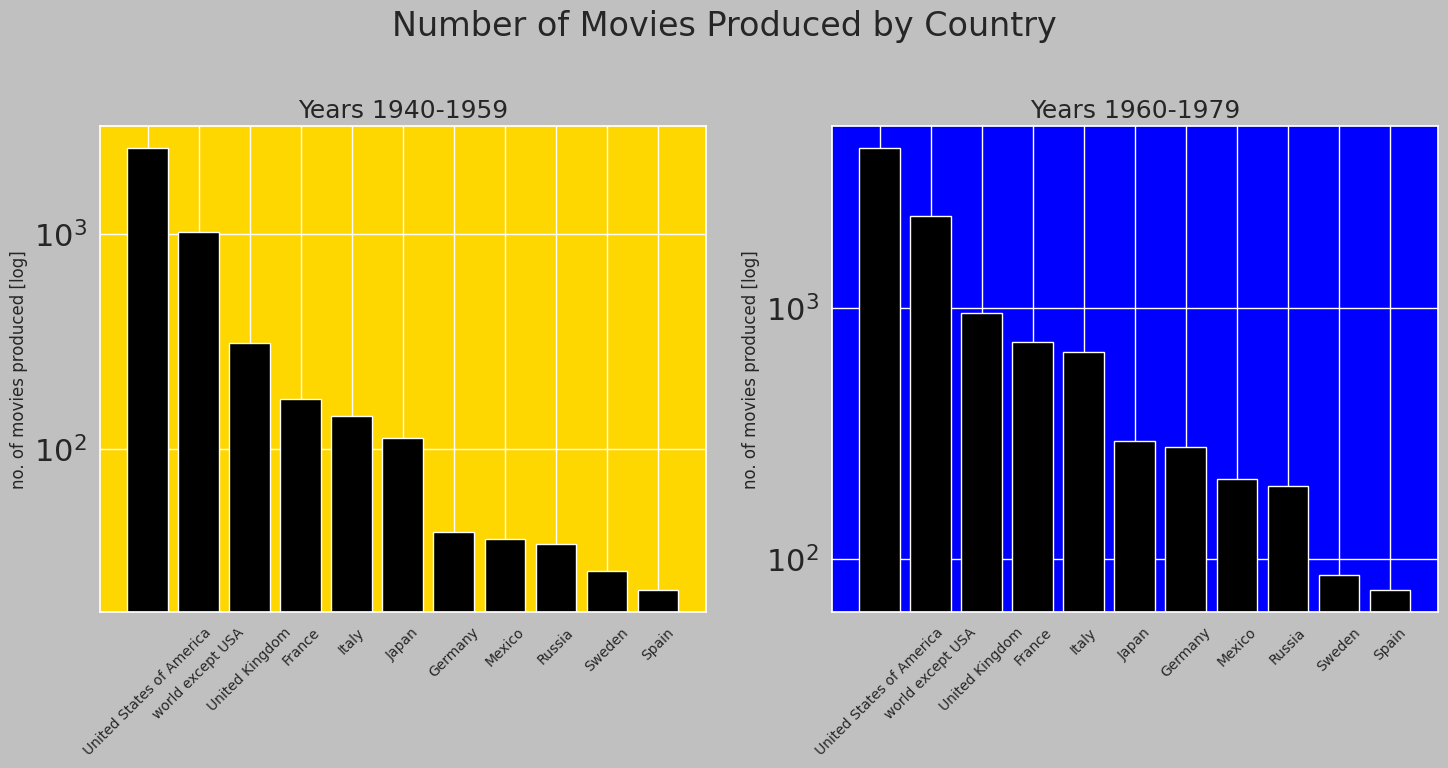

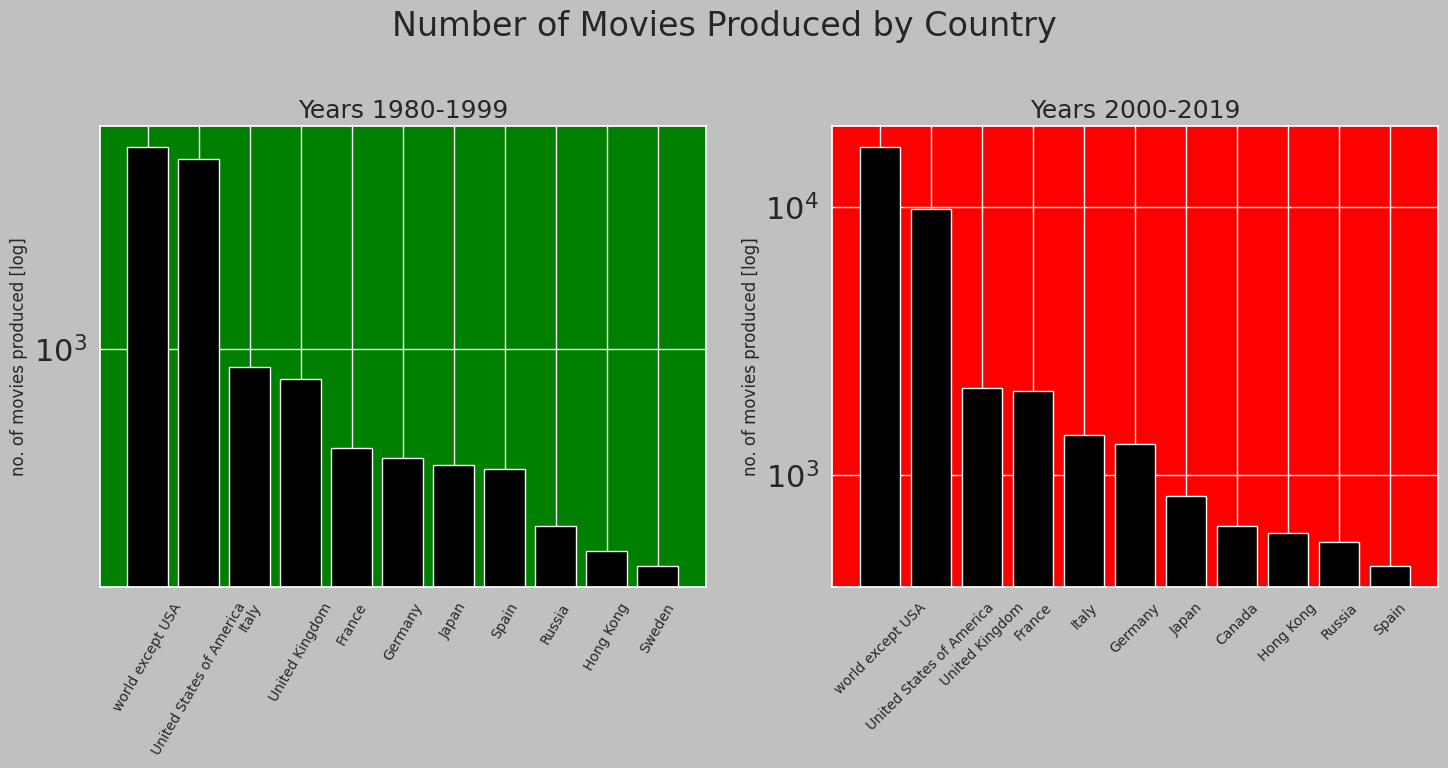

In [148]:
xval_4060 = [x[0] for x in top10_list_4060]
xval_6080 = [x[0] for x in top10_list_6080]
xval_8000 = [x[0] for x in top10_list_6080]
xval_0020 = [x[0] for x in top10_list_8000]
yval_4060 = [x[1] for x in top10_list_4060]
yval_6080 = [x[1] for x in top10_list_6080]
yval_8000 = [x[1] for x in top10_list_8000]
yval_0020 = [x[1] for x in top10_list_0020]

fig = plt.figure(figsize=(10,7));
(topfig,bottomfig) = fig.subfigures(2,1);

topfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,8));

axes[0].bar(x=xval_4060,height=yval_4060,color='black');
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45,fontsize=10);
axes[0].set_yscale('log')
axes[0].set_ylabel('no. of movies produced [log]',fontsize=12)
axes[0].set_title('Years 1940-1959',fontsize=18);
axes[0].set_facecolor('gold')

axes[1].bar(x=xval_6080,height=yval_6080,color='black');
axes[1].set_xticklabels(axes[0].get_xticklabels(),rotation=45,fontsize=10);
axes[1].set_yscale('log')
axes[1].set_ylabel('no. of movies produced [log]',fontsize=12)
axes[1].set_title('Years 1960-1979',fontsize=18);
axes[1].set_facecolor('blue')

fig.suptitle("Number of Movies Produced by Country",fontsize=24)
fig.set_facecolor('silver')
plt.tight_layout()


bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,8));

axes[0].bar(x=xval_8000,height=yval_8000,color='black');
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=60,fontsize=10);
axes[0].set_yscale('log')
axes[0].set_ylabel('no. of movies produced [log]',fontsize=12)
axes[0].set_title('Years 1980-1999',fontsize=18);
axes[0].set_facecolor('green')

axes[1].bar(x=xval_0020,height=yval_0020,color='black');
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45,fontsize=10);
axes[1].set_yscale('log')
axes[1].set_ylabel('no. of movies produced [log]',fontsize=12)
axes[1].set_title('Years 2000-2019',fontsize=18);
axes[1].set_facecolor('red')

fig.suptitle("Number of Movies Produced by Country",fontsize=24)
fig.set_facecolor('silver')
plt.tight_layout()

plt.tight_layout()
plt.show()

Now I will plot the number of movies produced by year.

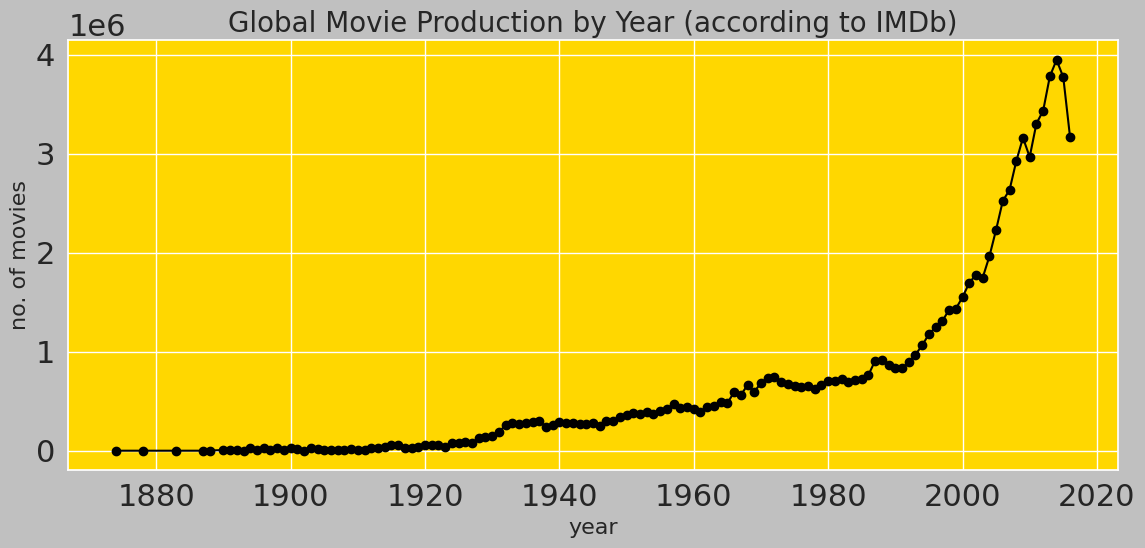

In [149]:
movies_by_year = movies[(movies['year'] != 0) & (movies['year'] < 2017)].groupby('year')['year'].sum().reset_index(name='TOT/year').sort_values(['TOT/year'],ascending=True)
sorted_movies_year = movies_by_year.sort_values(by='year',ascending=True)

plt.figure(figsize=(12,6))
plt.plot(sorted_movies_year['year'],sorted_movies_year['TOT/year'],'-o',color='black')

plt.xlabel('year',fontsize=16)
plt.ylabel('no. of movies',fontsize=16)
plt.title('Global Movie Production by Year (according to IMDb)',fontsize=20)

plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')
plt.show()

#sorted_movies_year

<div class="alert alert-block alert-info"> 📌 The data run from the late 1800s till 2017 and I have plotted the global production of movies till 2016. It would be interesting to find out whether the 2016 drop in the global movie production is something 'real' or if it has to do with the IMDb data collection and/or update.</div> 

### 3.2 When are Movies Released?

I want to know when movies are more frequently released: is it on Saturdays or Mondays? Is it in the winter or summertime? Is it on December or March?

In [150]:
movie_day = movies[movies['day_of_week'] != 'not available'].groupby('day_of_week')['day_of_week'].count().reset_index(name='TOT movie release/weekday').sort_values(['TOT movie release/weekday'],ascending=False)
movie_month = movies[movies['month'] != 'not available'].groupby('month')['month'].count().reset_index(name='TOT movie release/month').sort_values(['TOT movie release/month'],ascending=False)
movie_season = movies[movies['season'] != 'not available'].groupby('season')['season'].count().reset_index(name='TOT movie release/season').sort_values(['TOT movie release/season'],ascending=False)

movie_day

,day_of_week,TOT movie release/weekday
0,Friday,13761
4,Thursday,7452
6,Wednesday,6958
2,Saturday,5105
5,Tuesday,4594
3,Sunday,3572
1,Monday,3465


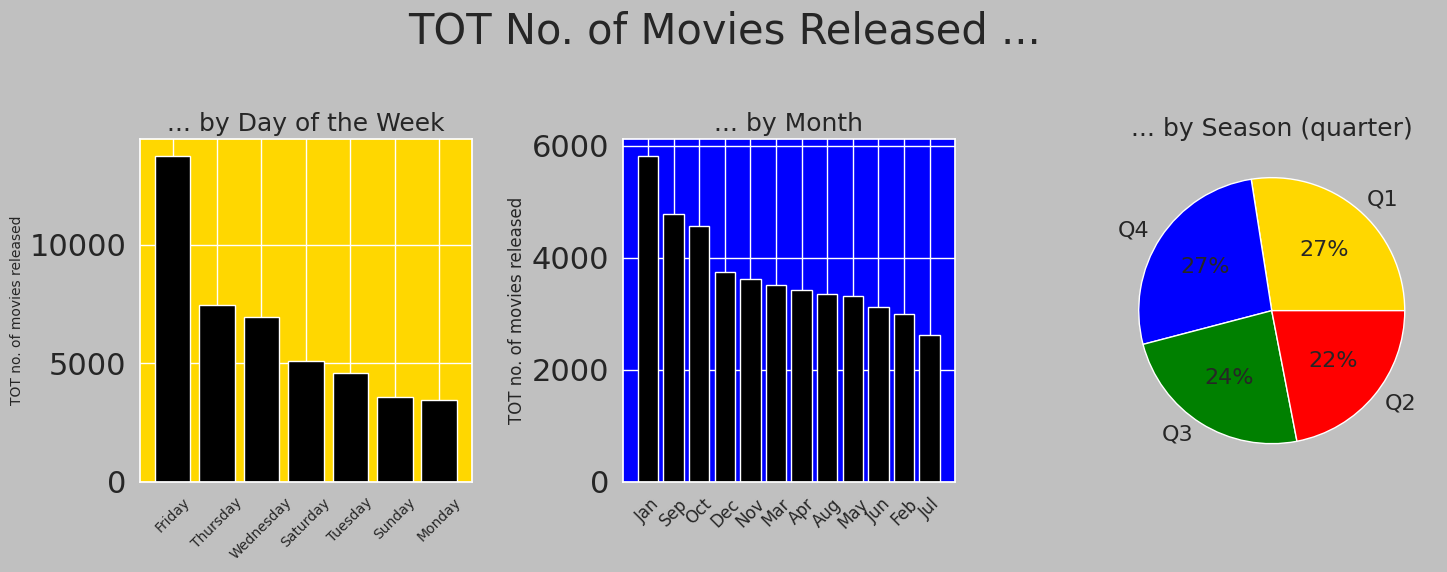

In [151]:
def label_function(val):
    return f'{val:.0f}%'

labels = movie_season['season']
sizes_season = movie_season['TOT movie release/season']

fig,axes = plt.subplots(1,3,figsize=(15,6));

axes[0].bar(x=movie_day['day_of_week'],height=movie_day['TOT movie release/weekday'],color='black');
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45,fontsize=10);
axes[0].set_ylabel('TOT no. of movies released',fontsize=10)
axes[0].set_title('... by Day of the Week',fontsize=18);
axes[0].set_facecolor('gold')

axes[1].bar(x=movie_month['month'],height=movie_month['TOT movie release/month'],color='black');
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45,fontsize=12);
axes[1].set_ylabel('TOT no. of movies released',fontsize=12)
axes[1].set_title('... by Month',fontsize=18);
axes[1].set_facecolor('blue')

axes[2].pie(sizes_season,labels=labels,autopct=label_function,colors=['gold','blue','green','red'],textprops={'fontsize':16})
axes[2].set_title('... by Season (quarter)',fontsize=18)

fig.suptitle("TOT No. of Movies Released ...",fontsize=30)
fig.set_facecolor('silver')
plt.tight_layout()

<div class="alert alert-block alert-success"> 📌 It is interesting to observe that the movies are usually released before the weekend, either on Fridays, Thursdays or Wednesdays. Monday is the worst day of the week for releasing a movie because the first weekend is missed.</div>
January, September and October are the best months for releasing a movie. Therefore one would expect the colder months to dominate over the warmer. However, by having a look at the pie chart, one finds out that this is not the case.

### 3.3 Production Companies

In [152]:
movies_company = {}

for company_list in movies['companies']:
    for company in company_list:
        if company not in movies_company:
            movies_company[company] = 0
        movies_company[company] += 1
            
top10_companies = sorted(movies_company,key=movies_company.get,reverse=True)[:10]

top10_CMPlist = []
for company in top10_companies:
    top10_CMPlist.append((company,movies_company[company]))
    
top10_CMPlist      

[('Warner Bros.', 1248),
 ('Metro-Goldwyn-Mayer (MGM)', 1073),
 ('Paramount Pictures', 996),
 ('Twentieth Century Fox Film Corporation', 834),
 ('Universal Pictures', 827),
 ('Columbia Pictures Corporation', 447),
 ('Canal+', 433),
 ('Columbia Pictures', 429),
 ('RKO Radio Pictures', 290),
 ('United Artists', 276)]

<div class="alert alert-block alert-success"> 📌 These are the top 10 companies. The majority of them are American, but there is also a French one (Canal+) and a company that was bought by the Sony Group (Columbia Pictures). </div>

Now let's plot a pie chart, including all the companies that produced at least 100 movies.

In [153]:
movies_company_pie = pd.DataFrame(movies_company.items(),columns=['company','no. of movies'])
movies_company_pie_gt50 = movies_company_pie[movies_company_pie['no. of movies'] > 100]

fig = px.sunburst(movies_company_pie_gt50,path=['company'],values='no. of movies',color='no. of movies',hover_data=['no. of movies'])

fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),height=800,title="Movie Production Companies (with more than 100 movies)",paper_bgcolor="grey",font=dict(color="black",size=18))

fig.show()

### 3.4 Genres

Now I am having a look at the movie genre classification. Before doing this, it is worth to note that (generally) in the movie dataset each film is assigned more than a genre. For example, Toy Story belongs to Animation, Comedy and Family.

In [154]:
movies_genre = {}

for genre_list in movies['genre']:
    for genre in genre_list:
        if genre not in movies_genre:
            movies_genre[genre] = 0
        movies_genre[genre] += 1
        
movies_genre_pie = pd.DataFrame(movies_genre.items(),columns=['genre','no. of movies'])

fig = px.sunburst(movies_genre_pie,path=['genre'],values='no. of movies',color='no. of movies',hover_data=['no. of movies'])

fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),height=800,title="Movie Genres",paper_bgcolor="grey",font=dict(color="black",size=18))

fig.show()        

### 3.5 Budgets and Revenues

I am plotting the distributions of budgets and revenues to see how they look like. I do not expect to get bell-shaped distributions; I expect to see right-skewed distributions because the number of high-budget movies is small compared to that of low-budget ones.

First, I have to convert the *budget* column from string to int64.

In [155]:
movies['budget'] = movies['budget'].astype('int64')

I am also excluding from the plot the zero values of revenues and budgets, which are the equivalent of nulls.

In [156]:
movie_budget = movies[movies['budget'] != 0]
movie_revenue = movies[movies['revenue'] != 0]

Finally, I want to plot boxplots for the two variables to see if there are outliers.

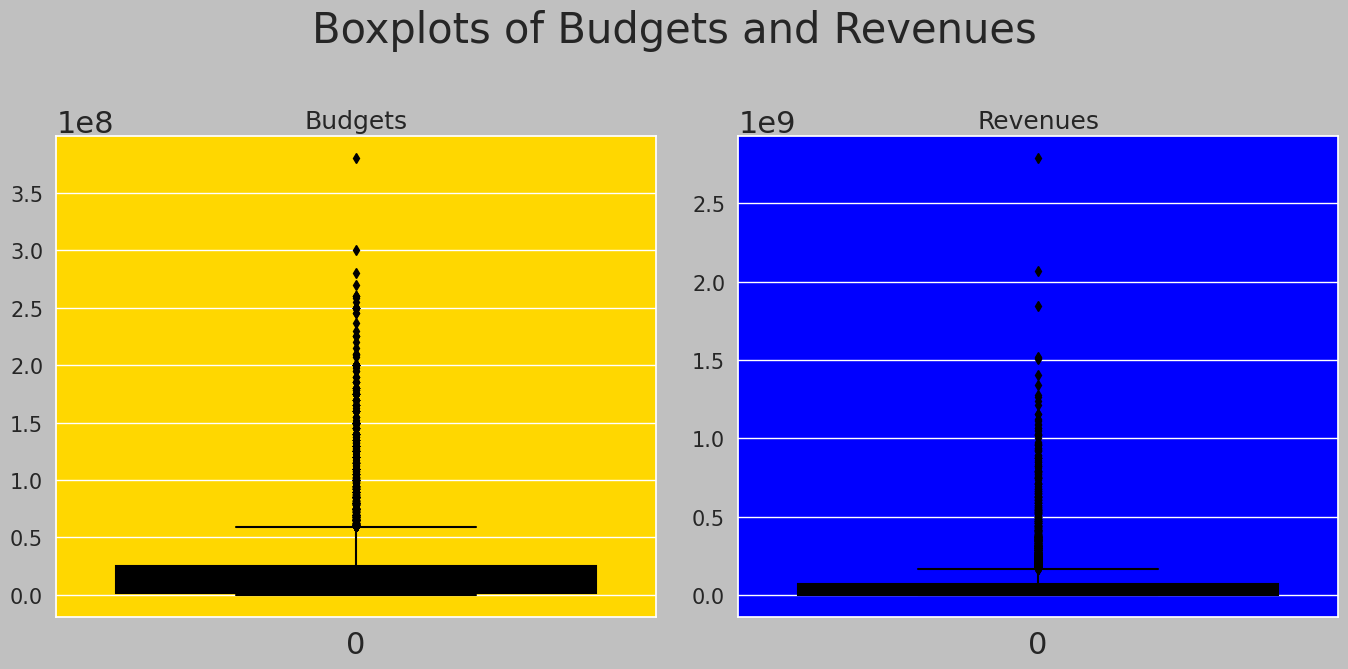

In [157]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,7))

ax1 = sns.boxplot(movie_budget['budget'],color='black',ax=ax1) 
ax1.yaxis.set_tick_params(labelsize=15)
ax1.set_facecolor('gold')
ax1.set_title('Budgets',fontsize=18)

ax2 = sns.boxplot(movie_revenue['revenue'],color='black',ax=ax2) 
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_facecolor('blue')
ax2.set_title('Revenues',fontsize=18)

fig.suptitle("Boxplots of Budgets and Revenues",fontsize=30)

fig.set_facecolor('silver')
plt.tight_layout() 

As expected, the two distributions are strongly skewed. If I had to conduct a regression analysis on movie data, then I would have to impute the outliers in the *budget* and *revenue* columns, but this is out of the scope of the present study.

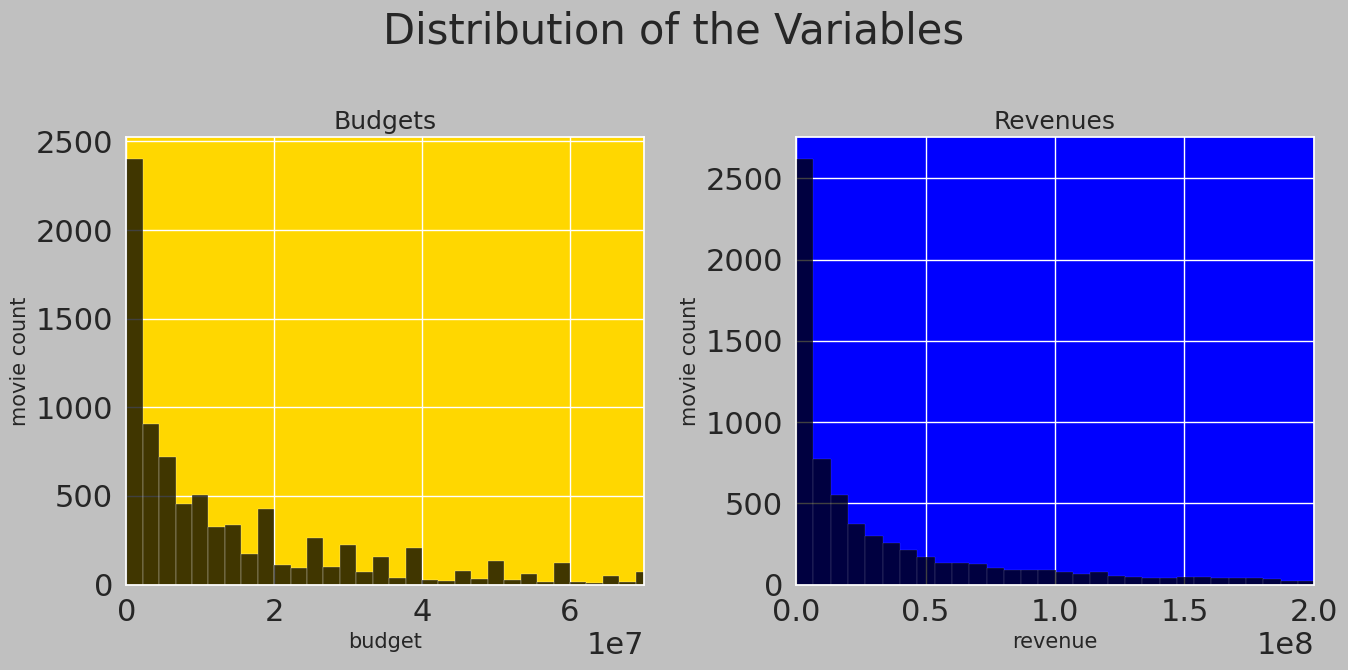

In [158]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(14,7))

ax1 = sns.histplot(movie_budget['budget'],color='black',ax=ax1) 
ax1.set_xlim(0,7*10**7)
ax1.set_title('Budgets',fontsize=18)
ax1.set_xlabel('budget',fontsize=15)
ax1.set_ylabel('movie count',fontsize=15)
ax1.set_facecolor('gold')

ax2 = sns.histplot(movie_revenue['revenue'],color='black',ax=ax2) 
ax2.set_xlim(0,2*10**8)
ax2.set_title('Revenues',fontsize=18)
ax2.set_xlabel('revenue',fontsize=15)
ax2.set_ylabel('movie count',fontsize=15)
ax2.set_facecolor('blue')

fig.suptitle("Distribution of the Variables",fontsize=30)

fig.set_facecolor('silver')
plt.tight_layout() 

### 3.6 Ratings, Vote Counts and Movie Popularity

Now, it is time to have a look at ratings, movie popularity and vote counts. However, before proceding, I have to convert the column formats (from string to int64 or float). Then I will have a look at the outliers.

In [159]:
movies['popularity'] = movies['popularity'].astype('float64')

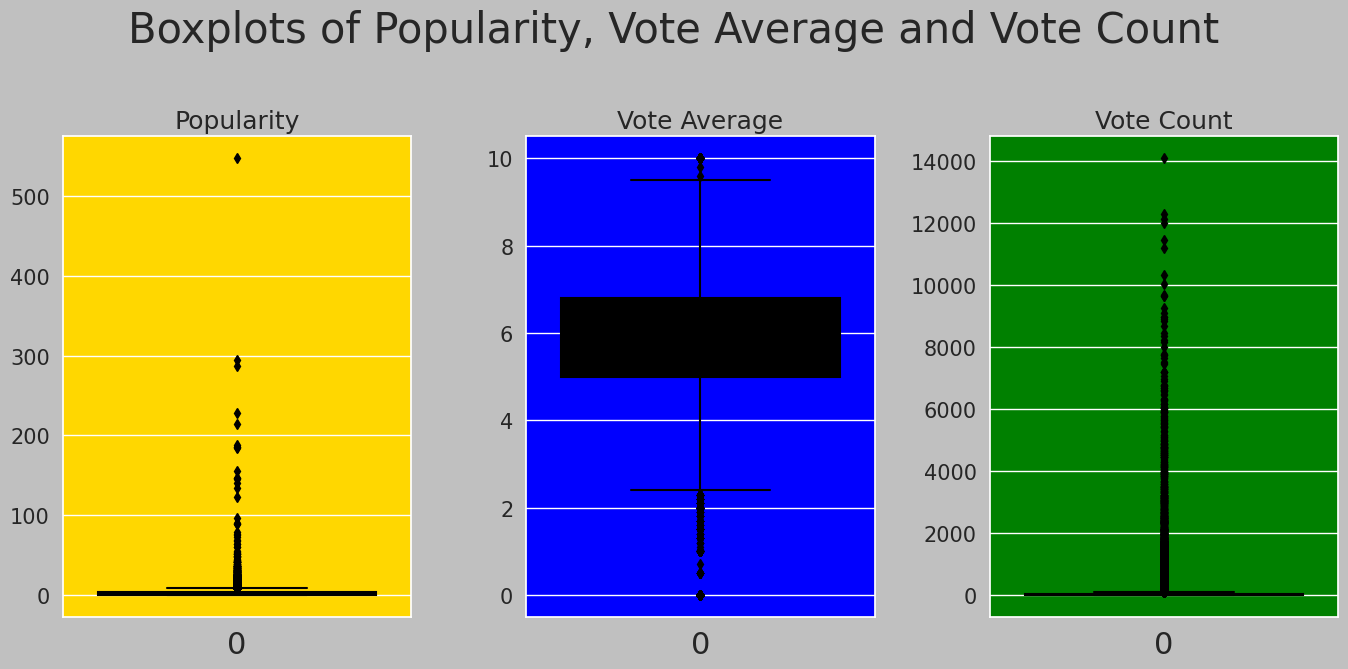

In [160]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,7))

ax1 = sns.boxplot(movies['popularity'],color='black',ax=ax1) 
ax1.yaxis.set_tick_params(labelsize=15)
ax1.set_facecolor('gold')
ax1.set_title('Popularity',fontsize=18)

ax2 = sns.boxplot(movies['vote_average'],color='black',ax=ax2) 
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_facecolor('blue')
ax2.set_title('Vote Average',fontsize=18)

ax3 = sns.boxplot(movies['vote_count'],color='black',ax=ax3) 
ax3.yaxis.set_tick_params(labelsize=15)
ax3.set_facecolor('green')
ax3.set_title('Vote Count',fontsize=18)

fig.suptitle("Boxplots of Popularity, Vote Average and Vote Count",fontsize=30)

fig.set_facecolor('silver')
plt.tight_layout() 

As shown in the boxplots above, the popularity and vote count distributions are heavily skewed. This is because the majority of movies have a low to moderate popularity/amount of votes, while there is a minority of movies with huge popularity and vote counts.

Let's plot the distributions now.

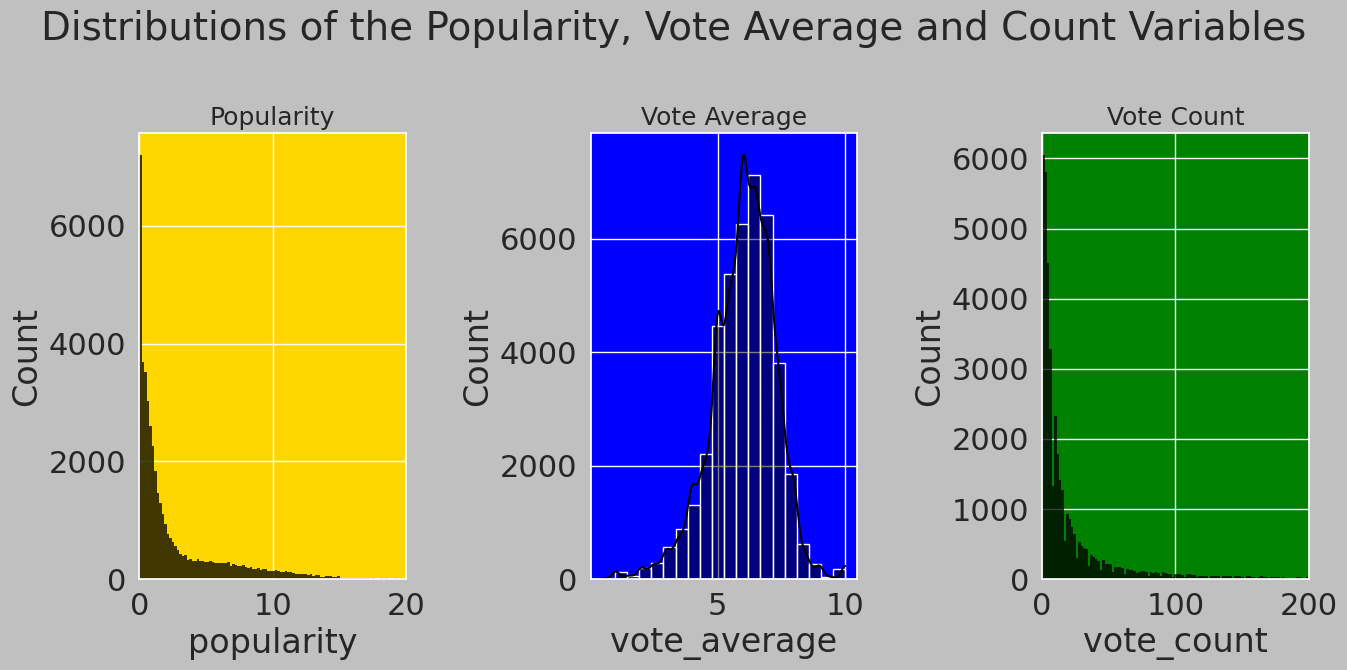

In [161]:
movie_pop = movies[(movies['popularity'] != 0)] 
movie_vote_avg = movies[movies['vote_average'] != 0]

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,7))

ax1 = sns.histplot(movie_pop['popularity'],color='black',ax=ax1) 
ax1.set_xlim(0,20)
ax1.set_title('Popularity',fontsize=18)
ax1.set_facecolor('gold')

ax2 = sns.histplot(movie_vote_avg['vote_average'],kde=True,color='black',bins=20,ax=ax2) 
ax2.set_title('Vote Average',fontsize=18)
ax2.set_facecolor('blue')

ax3 = sns.histplot(movies['vote_count'],color='black',ax=ax3) 
ax3.set_xlim(0,200)
ax3.set_title('Vote Count',fontsize=18)
ax3.set_facecolor('green')

fig.suptitle("Distributions of the Popularity, Vote Average and Count Variables",fontsize=28)

fig.set_facecolor('silver')
plt.tight_layout() 

As anticipated, the popularity and vote count distributions are right-skewed. On the contrary, the vote average distribution is bell-shaped. The reason of this is that the vote average spans the (fixed) 0-10 range, while in the other cases the values of popularity and vot count can be arbitrarily large.

**Correlation between budget (revenues) and ratings**

I want to see if there is a correlation between the budget and the rating/popularity of a movie. 

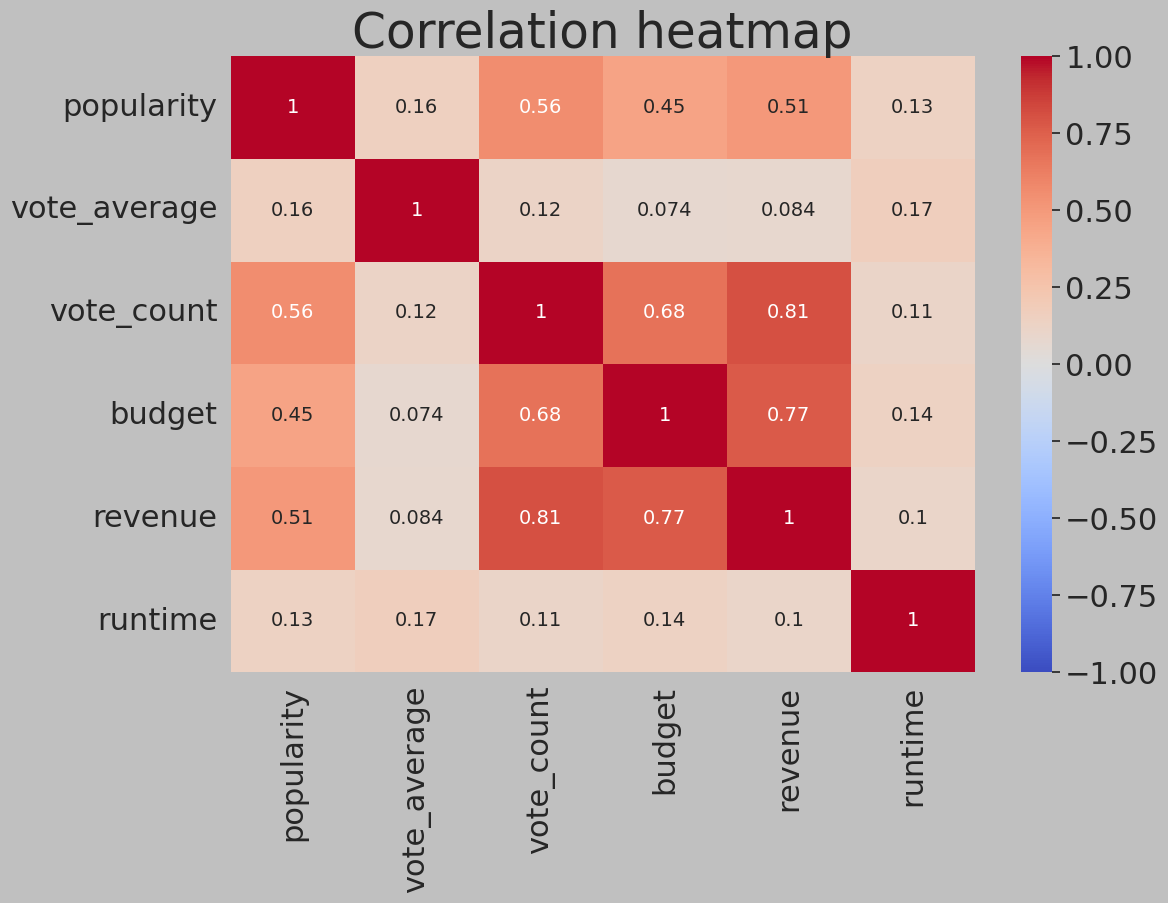

In [162]:
movie_crr = movies[['popularity','vote_average','vote_count','budget','revenue','runtime']]

plt.figure(figsize=(12,8))
sns.heatmap(movie_crr.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap='coolwarm',annot_kws={"fontsize":14})
sns.set(font_scale=2)
plt.title('Correlation heatmap',fontsize=35)

plt.gcf().patch.set_facecolor('silver')
plt.show();

<div class="alert alert-block alert-success"> 📌 There are some medium and strong correlations between the features. For example, see vote_count vs revenue/budget/popularity.</div>

### 3.7 Original Languages

Let's see what are the main original languages in the movie list.

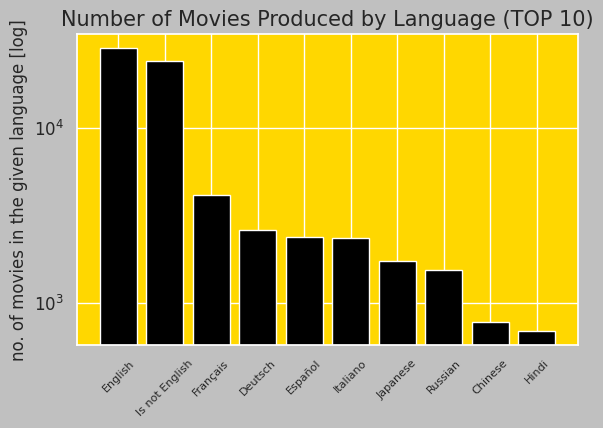

In [163]:
movies_language = {}
movies_language['Is not English'] = 0

for language_list in movies['languages']:
    for language in language_list:
        if language not in movies_language:
            movies_language[language] = 0
        movies_language[language] += 1
        if language != 'English':
            movies_language['Is not English'] += 1

top10_language_hist = pd.DataFrame(movies_language.items(),columns=['language','no. of movies']).sort_values(['no. of movies'],ascending=False).head(10)

top10_language_hist = top10_language_hist.replace('日本語','Japanese')
top10_language_hist = top10_language_hist.replace('Pусский','Russian')
top10_language_hist = top10_language_hist.replace('普通话','Chinese')
top10_language_hist = top10_language_hist.replace('हिन्दी','Hindi')

plt.bar(x=top10_language_hist['language'],height=top10_language_hist['no. of movies'],color='black')

plt.xlabel('')
plt.ylabel('no. of movies in the given language [log]',fontsize=12)
plt.yscale('log')
plt.title('Number of Movies Produced by Language (TOP 10)',fontsize=15)
plt.xticks(fontsize=8,rotation=45)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')
plt.show()

### 3.8 Movie Runtimes

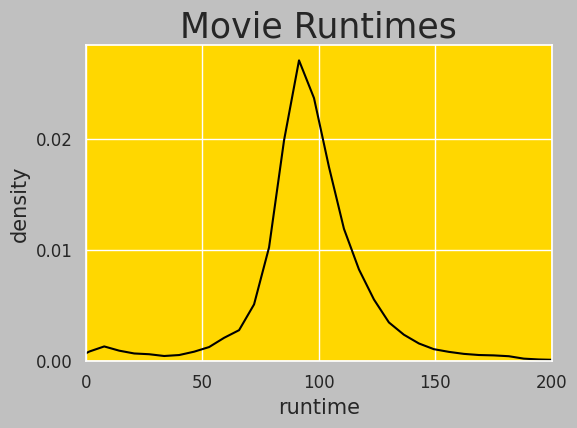

In [164]:
sns.distplot(movies[movies['runtime'] != 0]['runtime'],color='black',hist=False)
plt.title('Movie Runtimes',fontsize=25)
plt.ylabel('density',fontsize=15)
plt.xlabel('runtime',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,200)

plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')
plt.show()

The average movie runtime is around 90 minutes.

In [165]:
movies.head()

,adult,belongs_to_collection,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,languages,day_of_week,month,season,year,has_homepage,genre,companies,countries
0,False,Toy Story Collection,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,not available,Toy Story,7.7,5415.0,[English],Monday,Oct,Q4,1995,YES,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America]
1,False,not available,65000000,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[English, Français]",Friday,Dec,Q4,1995,NO,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,False,Grumpy Old Men Collection,0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,[English],Friday,Dec,Q4,1995,NO,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America]
3,False,not available,16000000,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,[English],Friday,Dec,Q4,1995,NO,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America]
4,False,Father of the Bride Collection,0,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,[English],Friday,Feb,Q1,1995,NO,[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America]


In [168]:
import pandas as pd

def round_runtime(x):
    return int(round(x / 10.0) * 10)

# 영화 데이터 필터링
movies = movies[movies['vote_average'] >= 5]
movies = movies[movies['vote_count'] >= 3]
movies['runtime'] = movies['runtime'].apply(round_runtime)

keep_columns = ['genre', 'runtime', 'companies']
my_movies = movies[keep_columns].copy()
my_movies['runtime'] = my_movies['runtime'].apply(lambda x: [str(x)])

# 각 열의 값 분포 확인 함수
def get_sorted_value_counts(df, column):
    value_counts = df[column].explode().value_counts()
    return value_counts.sort_values(ascending=True)

columns_to_check = ['genre', 'runtime', 'companies']

for col in columns_to_check:
    print(f"\nColumn: {col}")
    sorted_counts = get_sorted_value_counts(my_movies, col)
    print(sorted_counts)

# Pruning 기준: 상위 90%로 설정
def calculate_90th_percentile_threshold(df, column):
    value_counts = df[column].explode().value_counts()
    cumulative_sum = value_counts.cumsum()
    total = cumulative_sum.iloc[-1]
    threshold = cumulative_sum[cumulative_sum <= 0.9 * total].index
    threshold_count = value_counts.loc[threshold]
    print(f"Threshold for {column}:\n{threshold_count}")
    return set(threshold)

def prune_data(df, column, frequent_values):
    df[column] = df[column].apply(
        lambda x: [val if val in frequent_values else 'Other' for val in x]
    )
    return df

# Pruning 적용
top_90_values = {}
for col in columns_to_check:
    frequent_values = calculate_90th_percentile_threshold(my_movies, col)
    top_90_values[col] = frequent_values
    my_movies = prune_data(my_movies, col, frequent_values)

# One-Hot Encoding 함수
def one_hot_encode(df, column):
    encoded = pd.get_dummies(df[column].explode())
    encoded = encoded.fillna(0)
    return encoded.groupby(level=0).sum()

encoded_df = pd.concat([
    one_hot_encode(my_movies, 'genre'),
    one_hot_encode(my_movies, 'runtime'),
    one_hot_encode(my_movies, 'companies'),
], axis=1)

encoded_df = encoded_df.clip(upper=1)

# Apriori 알고리즘 적용
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print(rules)

rules.to_csv('association_rules.csv', index=False)



Column: genre
genre
TV Movie             440
Western              613
War                 1007
Foreign             1105
History             1120
Music               1125
Animation           1635
Fantasy             1746
Mystery             1881
Science Fiction     1922
Family              2093
Documentary         2326
Adventure           2600
Horror              2831
Crime               3354
Action              4707
Romance             4949
Thriller            5466
Comedy              9477
Drama              15083
Name: count, dtype: int64

Column: runtime
runtime
700       1
380       1
900       1
520       1
670       1
       ... 
120    2859
80     3216
110    3723
90     6559
100    7696
Name: count, Length: 68, dtype: int64

Column: companies
companies
Media Entertainment GmbH                           1
CinéTé Filmproductie BV                            1
Blackfin (Beijing) Culture & Media Co.             1
China Film (Shanghai) International Media Co.      1
Heaven Pictures (